In [1]:
# importing all the necessary library and packages

import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import os
from livelossplot import PlotLossesKerasTF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

C:\Users\Birat\anaconda3\envs\ai_gpu\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
# this method plots the accuracy and loss curves
def plot_model_history(model_history):
    
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1, len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')

    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    
    fig.savefig('accuracy_loss_plot.png')
    plt.show()

In [3]:
# Define data generators
train_dir = 'archive/train'
val_dir = 'archive/test'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
modelN = Sequential()


modelN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
modelN.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(MaxPooling2D(pool_size=(2, 2)))
modelN.add(Dropout(0.25))

modelN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(MaxPooling2D(pool_size=(2, 2)))
modelN.add(Dropout(0.25))

modelN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(MaxPooling2D(pool_size=(2, 2)))
modelN.add(Dropout(0.25))

modelN.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelN.add(Dense(1024, activation='relu'))
modelN.add(Dropout(0.5))
modelN.add(Dense(64, activation='relu'))
modelN.add(Dropout(0.5))
modelN.add(Dense(7, activation='softmax'))

# optimizer:
# modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelN.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

model_info = modelN.fit_generator(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)

Epoch 1/50


C:\Users\Birat\anaconda3\envs\ai_gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Birat\AppData\Local\Temp\ipykernel_6552\2925202190.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info = modelN.fit_generator(


448/448 [==============================] - 28s 50ms/step - loss: 1.8612 - accuracy: 0.2268 - val_loss: 1.8202 - val_accuracy: 0.2469
Epoch 2/50
448/448 [==============================] - 17s 37ms/step - loss: 1.8110 - accuracy: 0.2472 - val_loss: 1.7274 - val_accuracy: 0.3154
Epoch 3/50
448/448 [==============================] - 25s 56ms/step - loss: 1.6904 - accuracy: 0.3313 - val_loss: 1.5400 - val_accuracy: 0.4109
Epoch 4/50
448/448 [==============================] - 18s 40ms/step - loss: 1.5643 - accuracy: 0.3924 - val_loss: 1.4595 - val_accuracy: 0.4442
Epoch 5/50
448/448 [==============================] - 15s 33ms/step - loss: 1.4814 - accuracy: 0.4310 - val_loss: 1.3830 - val_accuracy: 0.4742
Epoch 6/50
448/448 [==============================] - 14s 31ms/step - loss: 1.4243 - accuracy: 0.4533 - val_loss: 1.3358 - val_accuracy: 0.4883
Epoch 7/50
448/448 [==============================] - 14s 31ms/step - loss: 1.3783 - accuracy: 0.4735 - val_loss: 1.2913 - val_accuracy: 0.5049
Epo

C:\Users\Birat\AppData\Local\Temp\ipykernel_6552\2115912450.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = modelN.predict_generator(validation_generator, steps=num_batches)


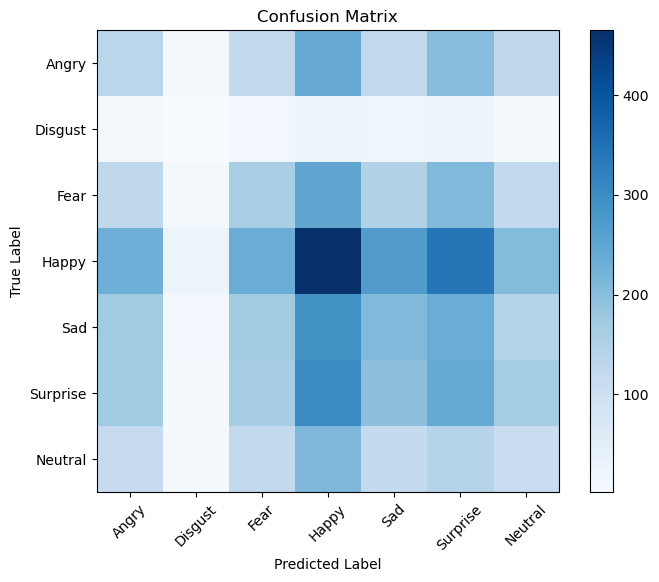

In [5]:
# Get the true labels and predicted labels
true_labels = validation_generator.classes
num_batches = len(validation_generator)
predictions = modelN.predict_generator(validation_generator, steps=num_batches)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(7), ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], rotation=45)
plt.yticks(np.arange(7), ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.show()

In [7]:
save_model(modelN, 'finall_model.h5')
print("Model saved!")

Model saved!


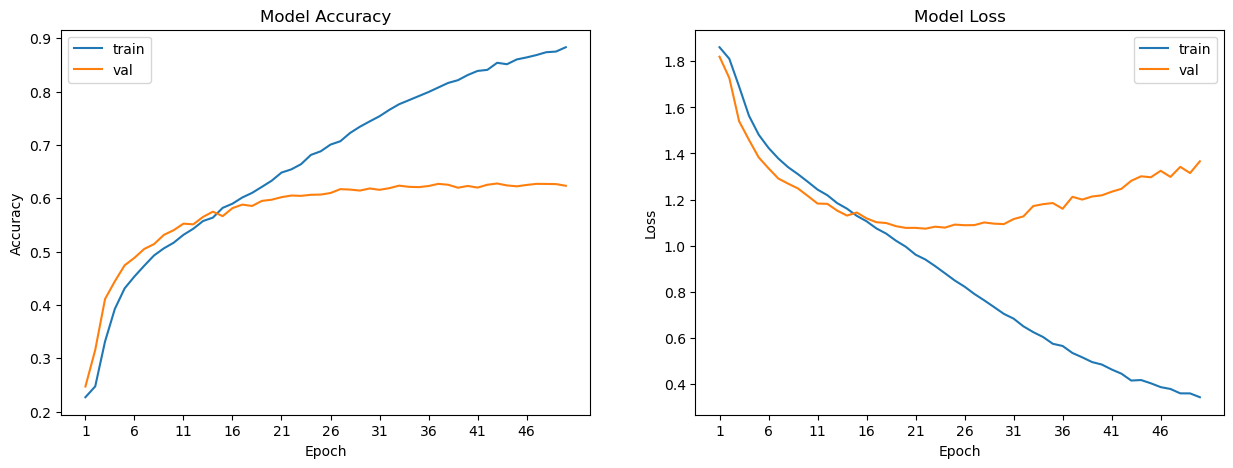

In [8]:
plot_model_history(model_info)

In [9]:
accuracy = model_info.history['accuracy'][-1]
print("Final Accuracy:", accuracy)

Final Accuracy: 0.8831908106803894


In [15]:
print(tf.config.experimental.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [18]:
tf.test.is_gpu_available(
    cuda_only = False, min_cuda_compute_capability = None
)

True

In [ ]:
# prevents openCL usage and unnecessary logging messages
cv2.ocl.setUseOpenCL(False)


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# start the webcam feed
cap = cv2.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
